In [16]:
%load_ext autoreload
%autoreload 2
import os
import sys
import io
import torch 
import time
import numpy as np
from collections import OrderedDict
from matplotlib import pylab as plt

%pylab inline
rcParams["figure.figsize"] = (16,5)
sys.path.append('/home/erogol/projects/')

import librosa
import librosa.display

from TTS.models.tacotron import Tacotron 
from TTS.layers import *
from TTS.utils.data import *
from TTS.utils.audio import AudioProcessor
from TTS.utils.generic_utils import load_config
from TTS.utils.text import text_to_sequence

import IPython
from IPython.display import Audio
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/erogol/miniconda3/envs/pytorch4/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
ls /data/shared/erogol_models/May-14-2018_07:10PM-stop-token-separate-larger-lr-b2e09f9

best_model.pth.tar        checkpoint_35344.pth.tar
checkpoint_10152.pth.tar  checkpoint_35720.pth.tar
checkpoint_10528.pth.tar  checkpoint_36096.pth.tar
checkpoint_10904.pth.tar  checkpoint_36472.pth.tar
checkpoint_1128.pth.tar   checkpoint_36848.pth.tar
checkpoint_11280.pth.tar  checkpoint_37224.pth.tar
checkpoint_11656.pth.tar  checkpoint_376.pth.tar
checkpoint_12032.pth.tar  checkpoint_3760.pth.tar
checkpoint_12408.pth.tar  checkpoint_37600.pth.tar
checkpoint_12784.pth.tar  checkpoint_37976.pth.tar
checkpoint_13160.pth.tar  checkpoint_38352.pth.tar
checkpoint_13536.pth.tar  checkpoint_38728.pth.tar
checkpoint_13912.pth.tar  checkpoint_39104.pth.tar
checkpoint_14288.pth.tar  checkpoint_39480.pth.tar
checkpoint_14664.pth.tar  checkpoint_39856.pth.tar
checkpoint_1504.pth.tar   checkpoint_40232.pth.tar
checkpoint_15040.pth.tar  checkpoint_40608.pth.tar
checkpoint_15416.pth.tar  checkpoint_40984.pth.tar
checkpoint_15792.pth.tar  checkpoint_4136.pth.tar
checkpoint_16168.pth.tar  checkpoin

In [18]:
def tts(model, text, CONFIG, use_cuda, ap, figures=True):
    t_1 = time.time()
    waveform, alignment, spectrogram, stop_tokens = create_speech(model, text, CONFIG, use_cuda, ap) 
    print(" >  Run-time: {}".format(time.time() - t_1))
    if figures:                                                                                                         
        visualize(alignment, spectrogram, stop_tokens, CONFIG)                                                                       
    IPython.display.display(Audio(waveform, rate=CONFIG.sample_rate))  
    return alignment, spectrogram, stop_tokens

In [19]:
# Set constants
ROOT_PATH = '/data/shared/erogol_models/May-15-2018_04:12PM-stop-token-rnn-40f1a3d/'
MODEL_PATH = ROOT_PATH + '/checkpoint_16920.pth.tar'
CONFIG_PATH = ROOT_PATH + '/config.json'
OUT_FOLDER = ROOT_PATH + '/test/'
CONFIG = load_config(CONFIG_PATH)
use_cuda = True

In [20]:
# load the model
model = Tacotron(CONFIG.embedding_size, CONFIG.num_freq, CONFIG.num_mels, CONFIG.r)

# load the audio processor

ap = AudioProcessor(CONFIG.sample_rate, CONFIG.num_mels, CONFIG.min_level_db,
                    CONFIG.frame_shift_ms, CONFIG.frame_length_ms, CONFIG.preemphasis,
                    CONFIG.ref_level_db, CONFIG.num_freq, CONFIG.power, griffin_lim_iters=30)         


# load model state
if use_cuda:
    cp = torch.load(MODEL_PATH)
else:
    cp = torch.load(MODEL_PATH, map_location=lambda storage, loc: storage)

# load the model
model.load_state_dict(cp['model'])
if use_cuda:
    model.cuda()
model.eval()

 | > Number of characters : 149


TypeError: super(type, obj): obj must be an instance or subtype of type

### EXAMPLES FROM TRAINING SET

In [21]:
import pandas as pd
df = pd.read_csv('/data/shared/KeithIto/LJSpeech-1.0/metadata_val.csv', delimiter='|')

Hosty took the necessary steps to have the Dallas office of the FBI, rather than the New Orleans office, reestablished as the office with principal responsibility.


/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 6.3198254108428955


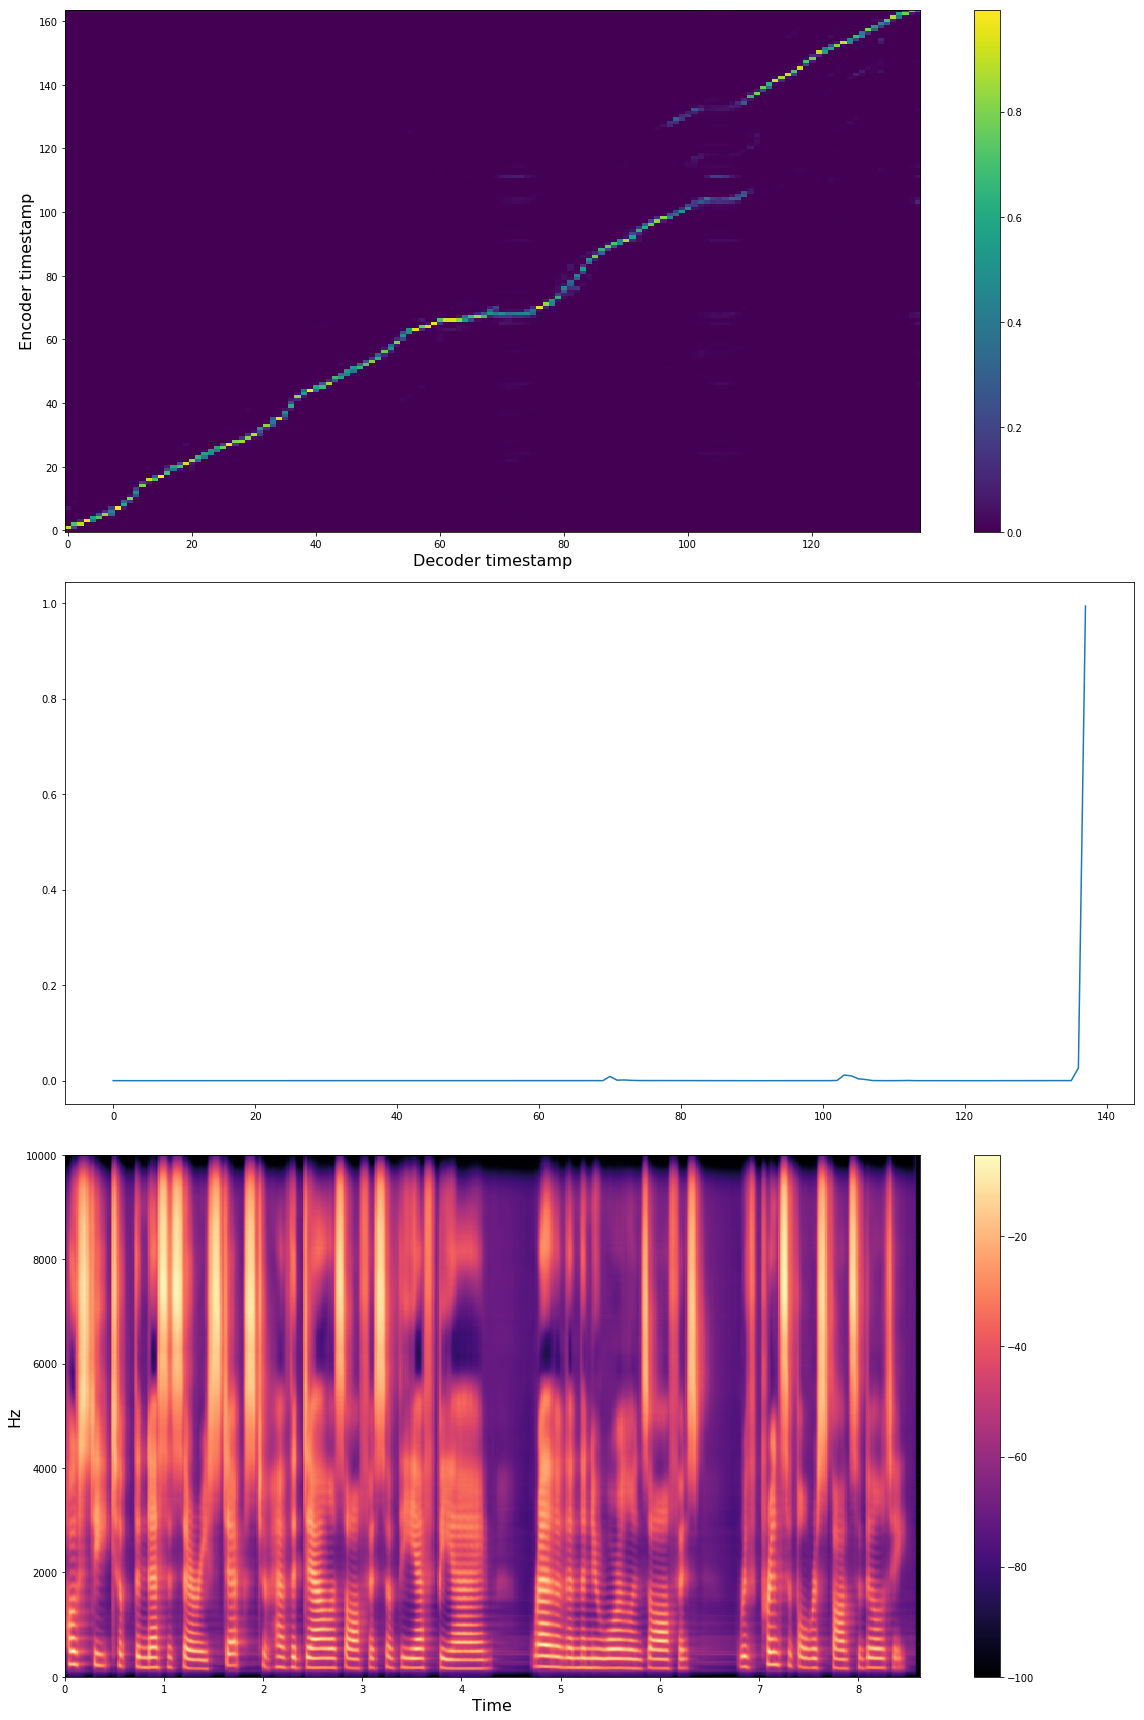

In [22]:
sentence = df.iloc[175, 1]
print(sentence)
model.decoder.max_decoder_steps = 250
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

### Comparision with https://mycroft.ai/blog/available-voices/

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 4.629634857177734


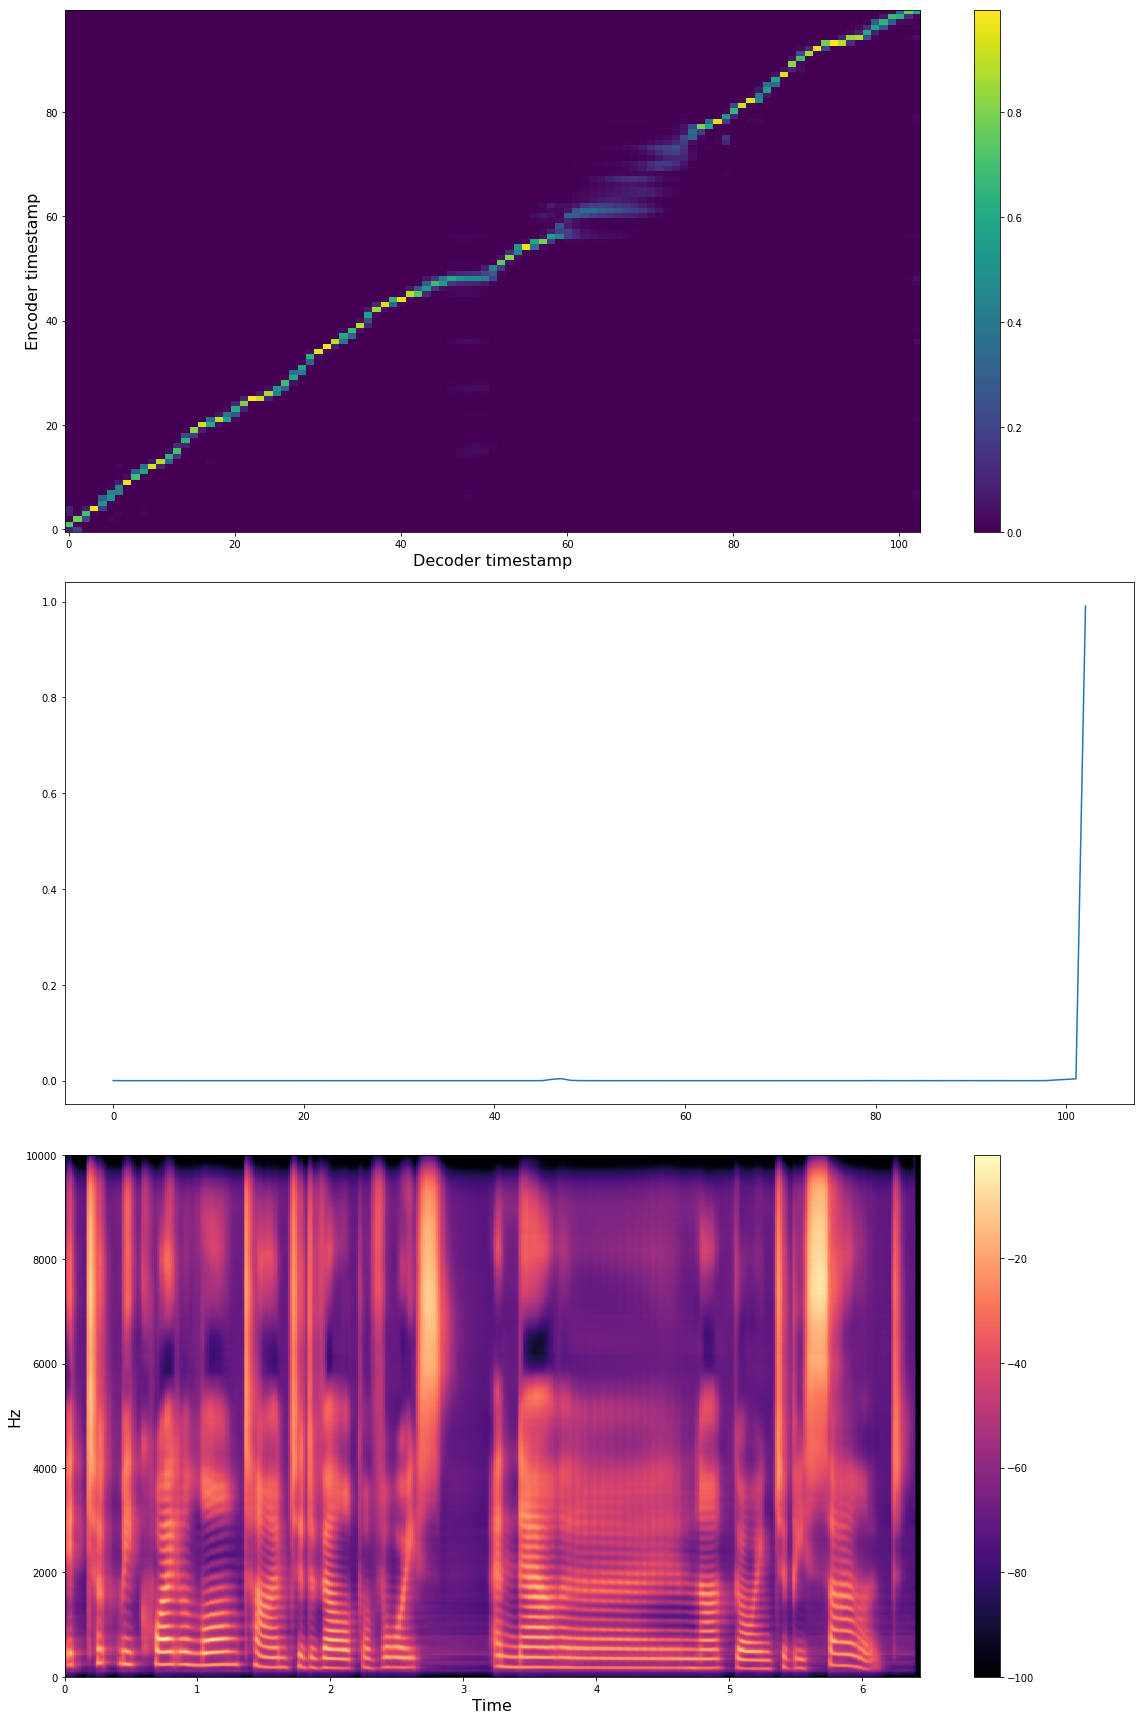

In [23]:
sentence =  "It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent."
model.decoder.max_decoder_steps = 250
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap, figures=True)

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 1.2954251766204834


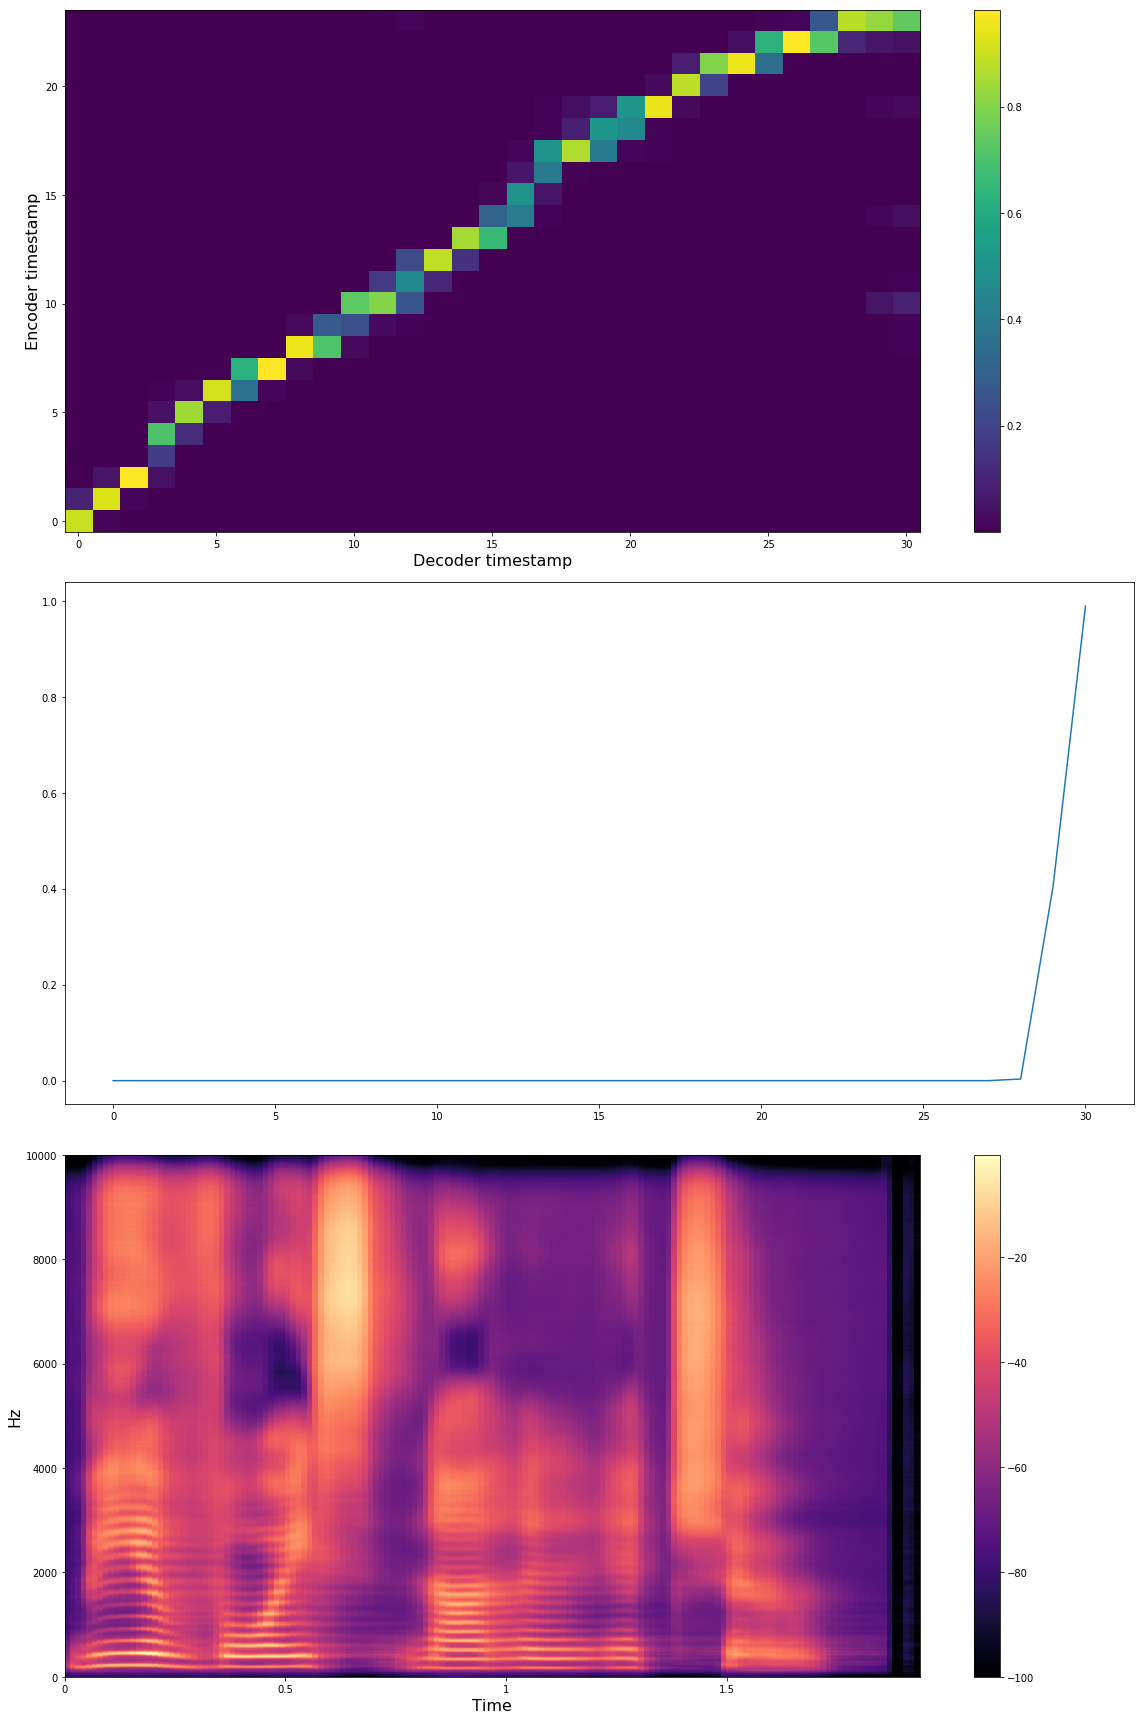

In [24]:
sentence = "Be a voice,not an echo."  # 'echo' is not in training set. 
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 2.442563772201538


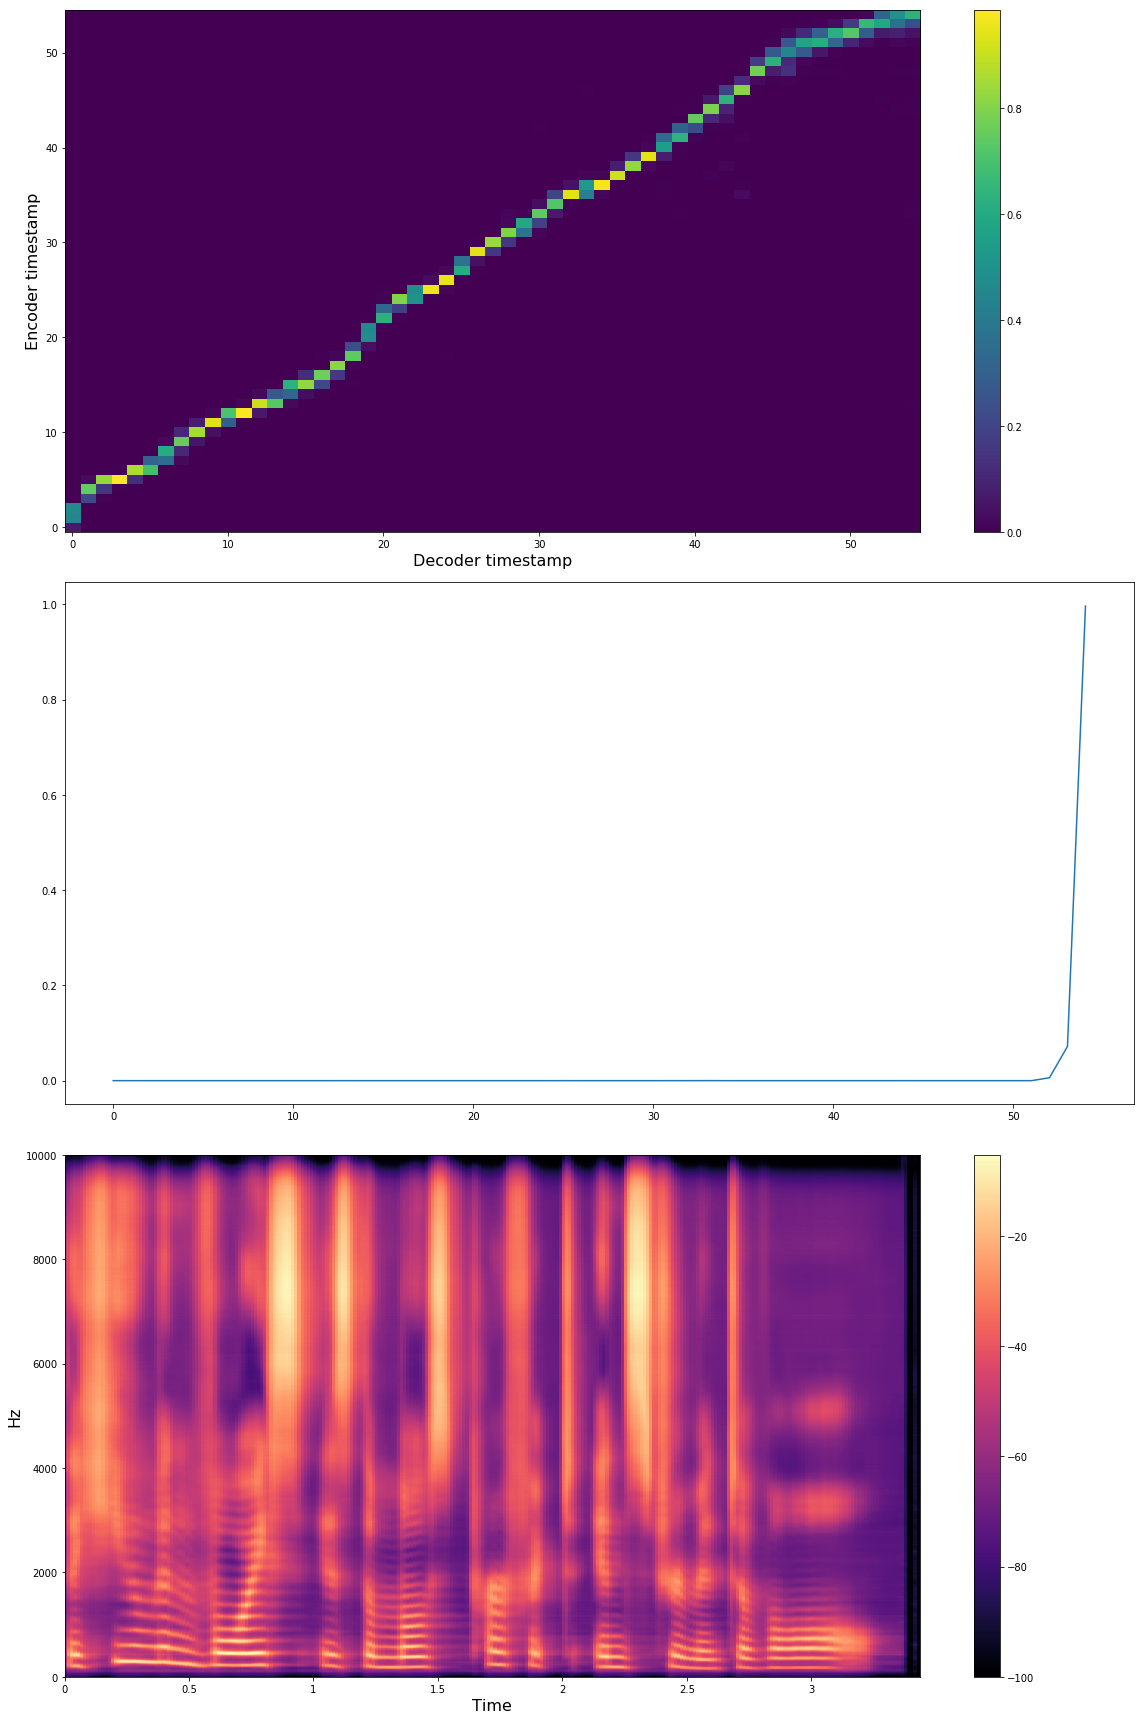

In [25]:
sentence = "The human voice is the most perfect instrument of all."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 2.959503412246704


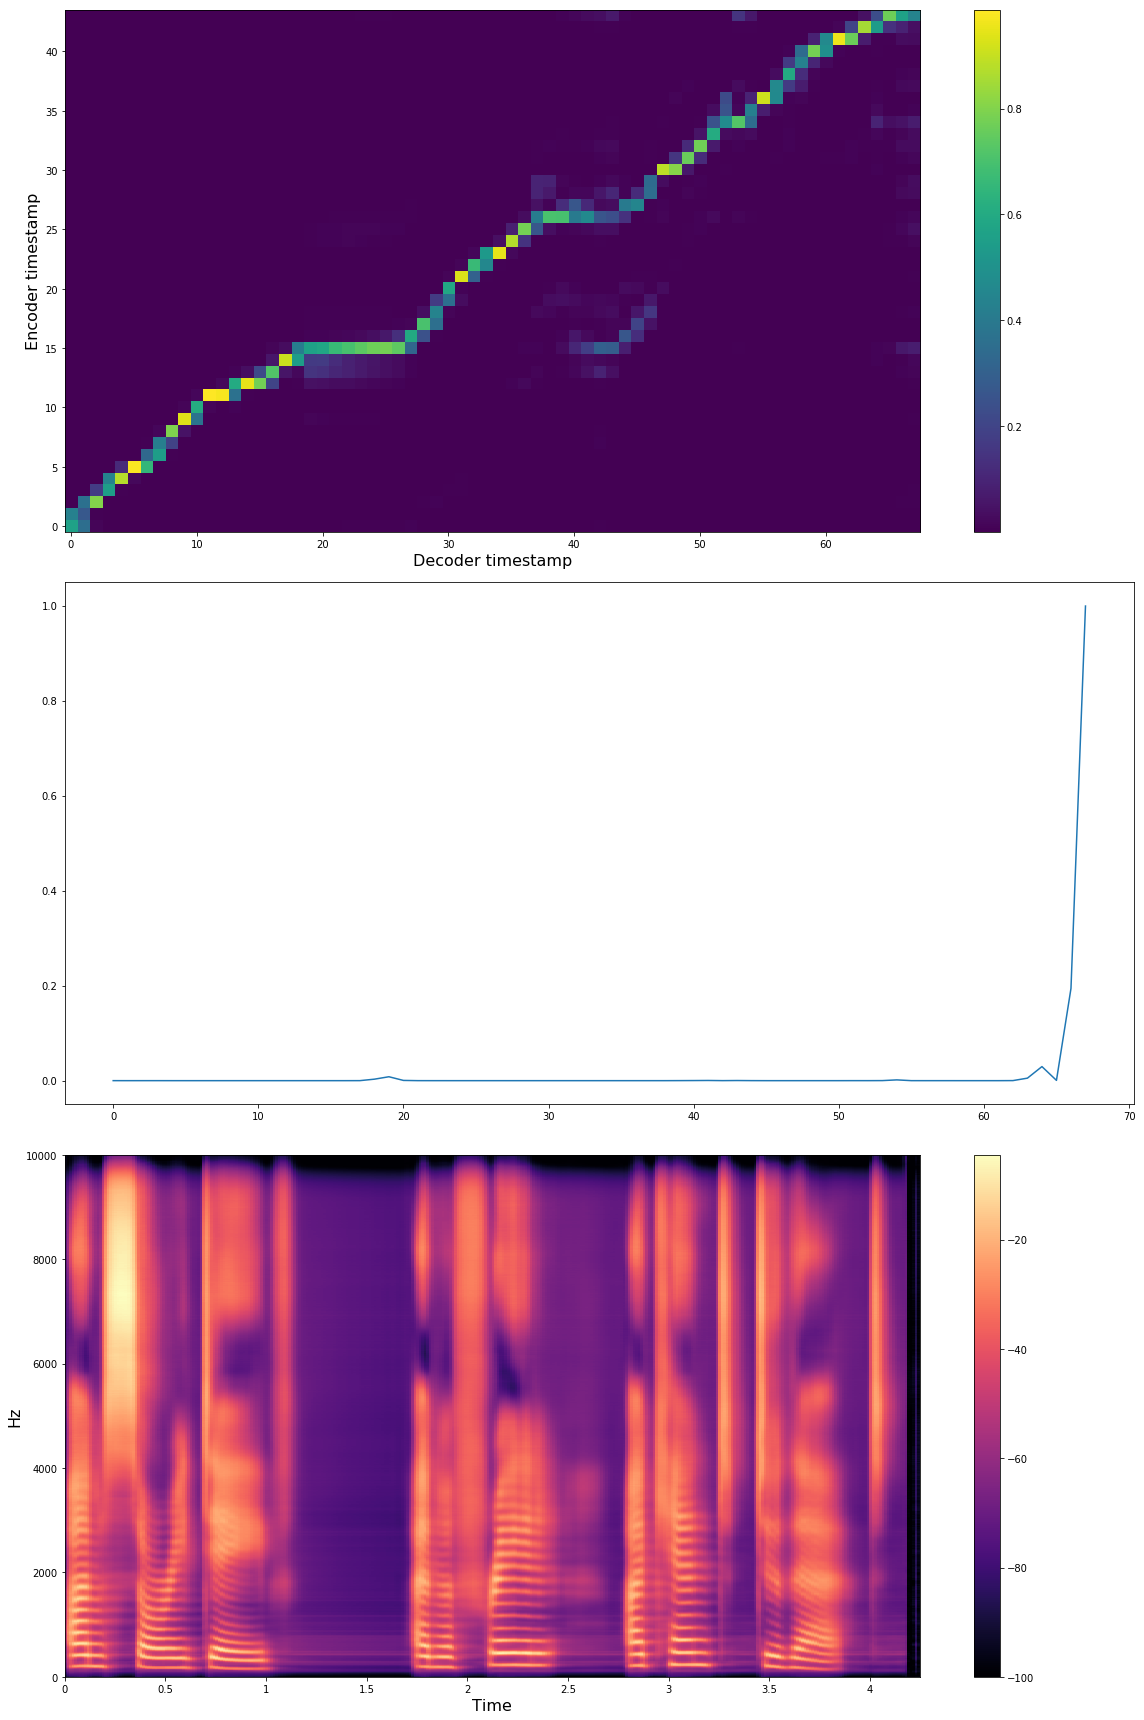

In [26]:
sentence = "I'm sorry Dave. I'm afraid I can't do that."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 3.3856382369995117


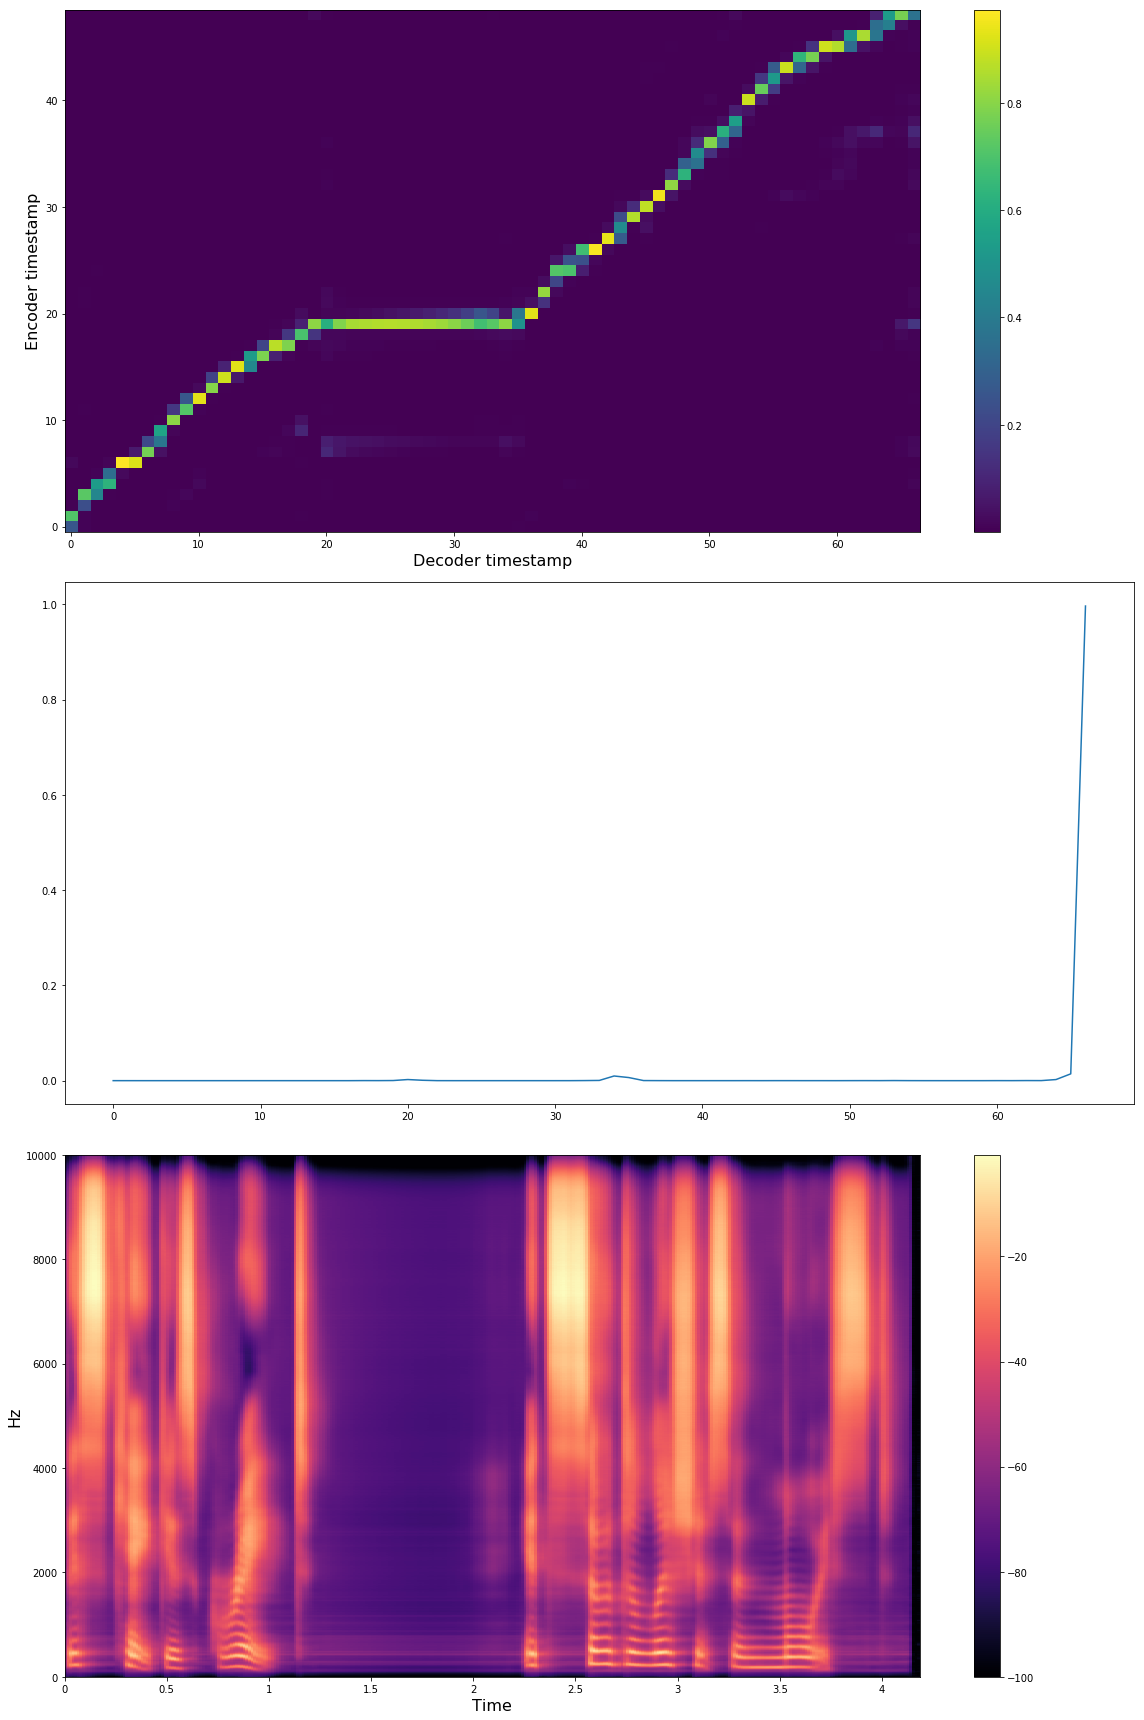

In [27]:
sentence = "This cake is great. It's so delicious and moist."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

### Comparison with https://keithito.github.io/audio-samples/

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 3.539504289627075


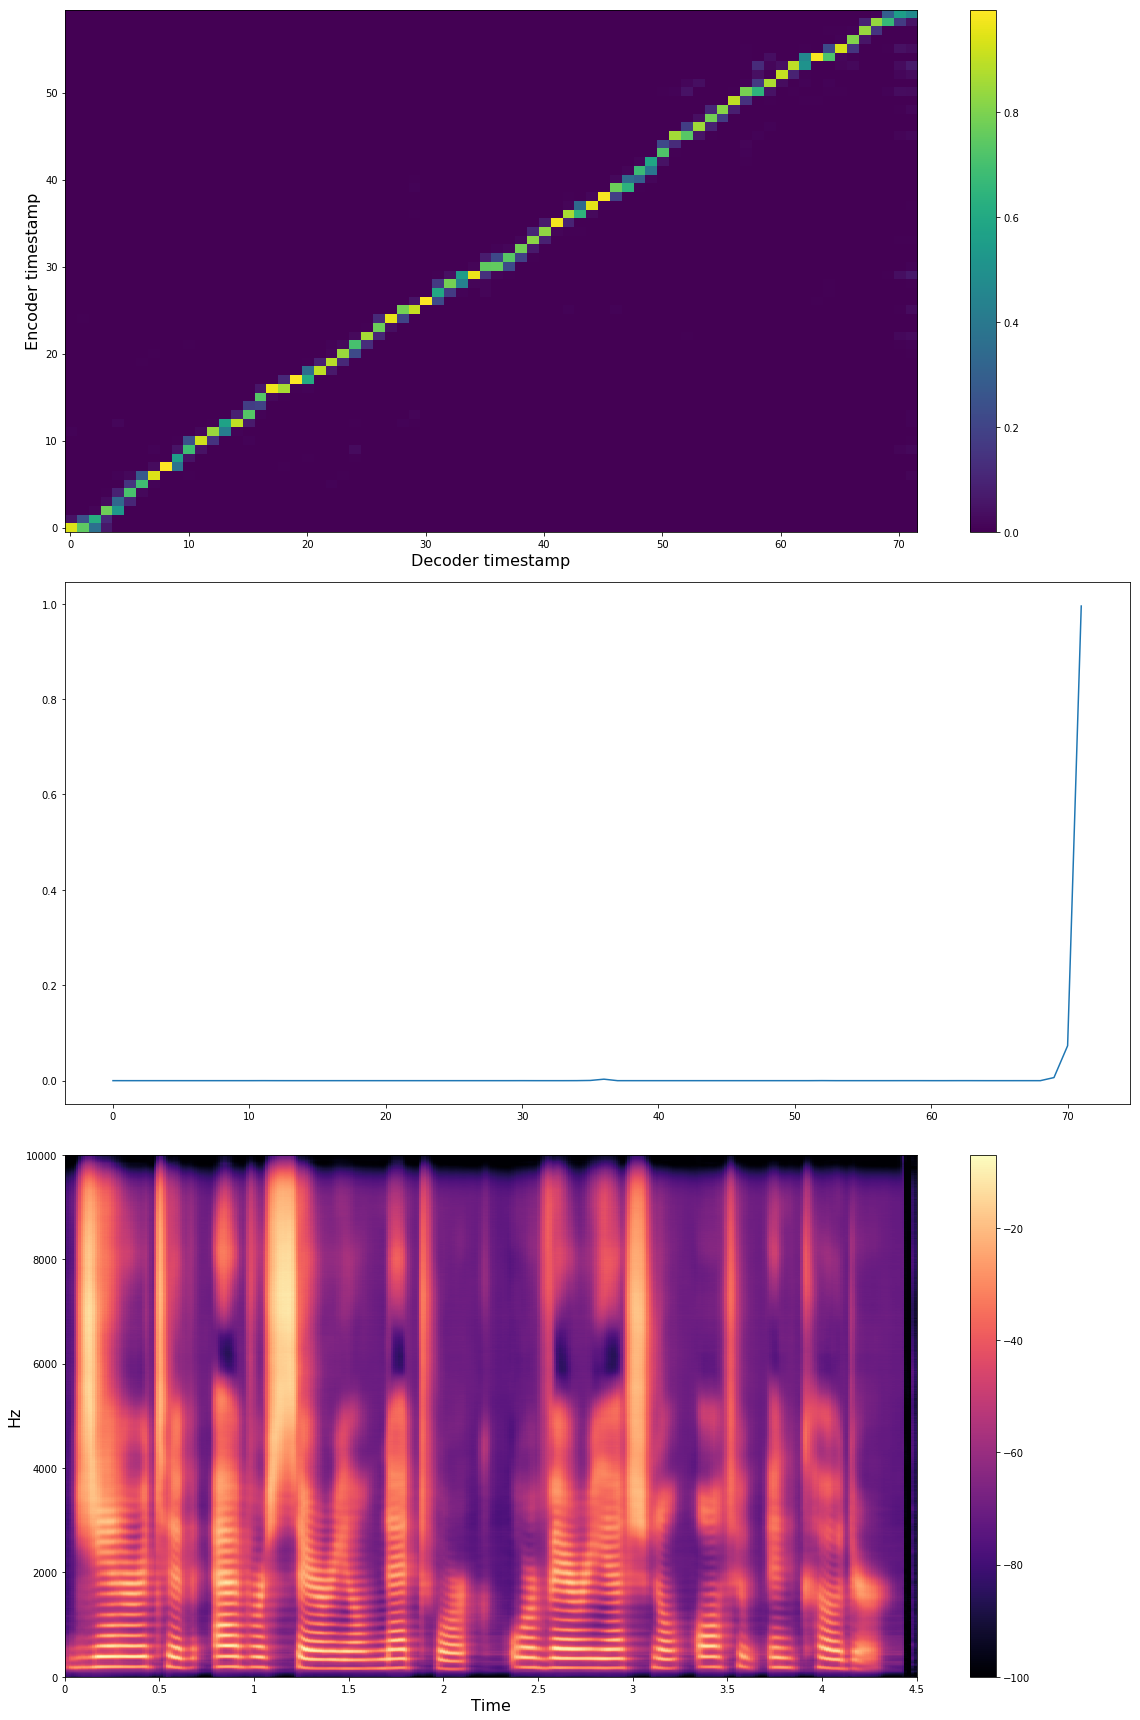

In [28]:
sentence = "Generative adversarial network or variational auto-encoder."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 3.4460177421569824


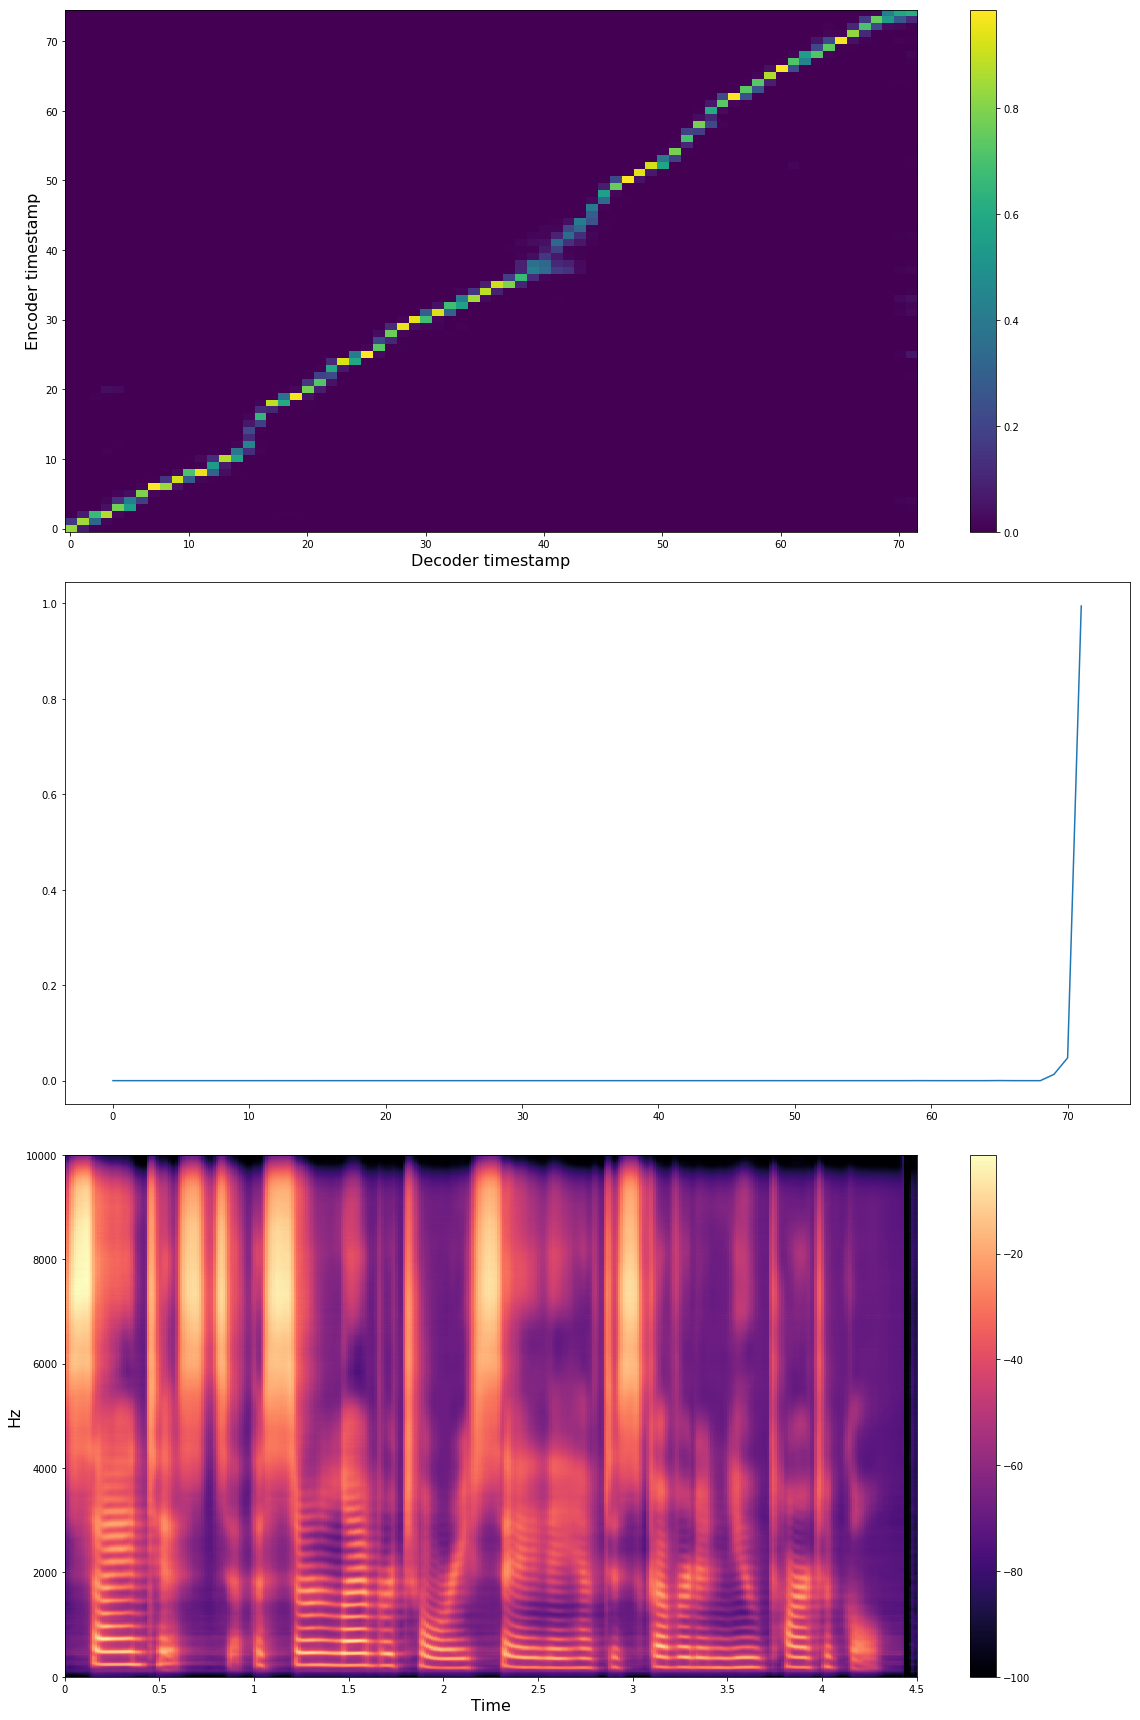

In [29]:
sentence = "Scientists at the CERN laboratory say they have discovered a new particle."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 3.5448789596557617


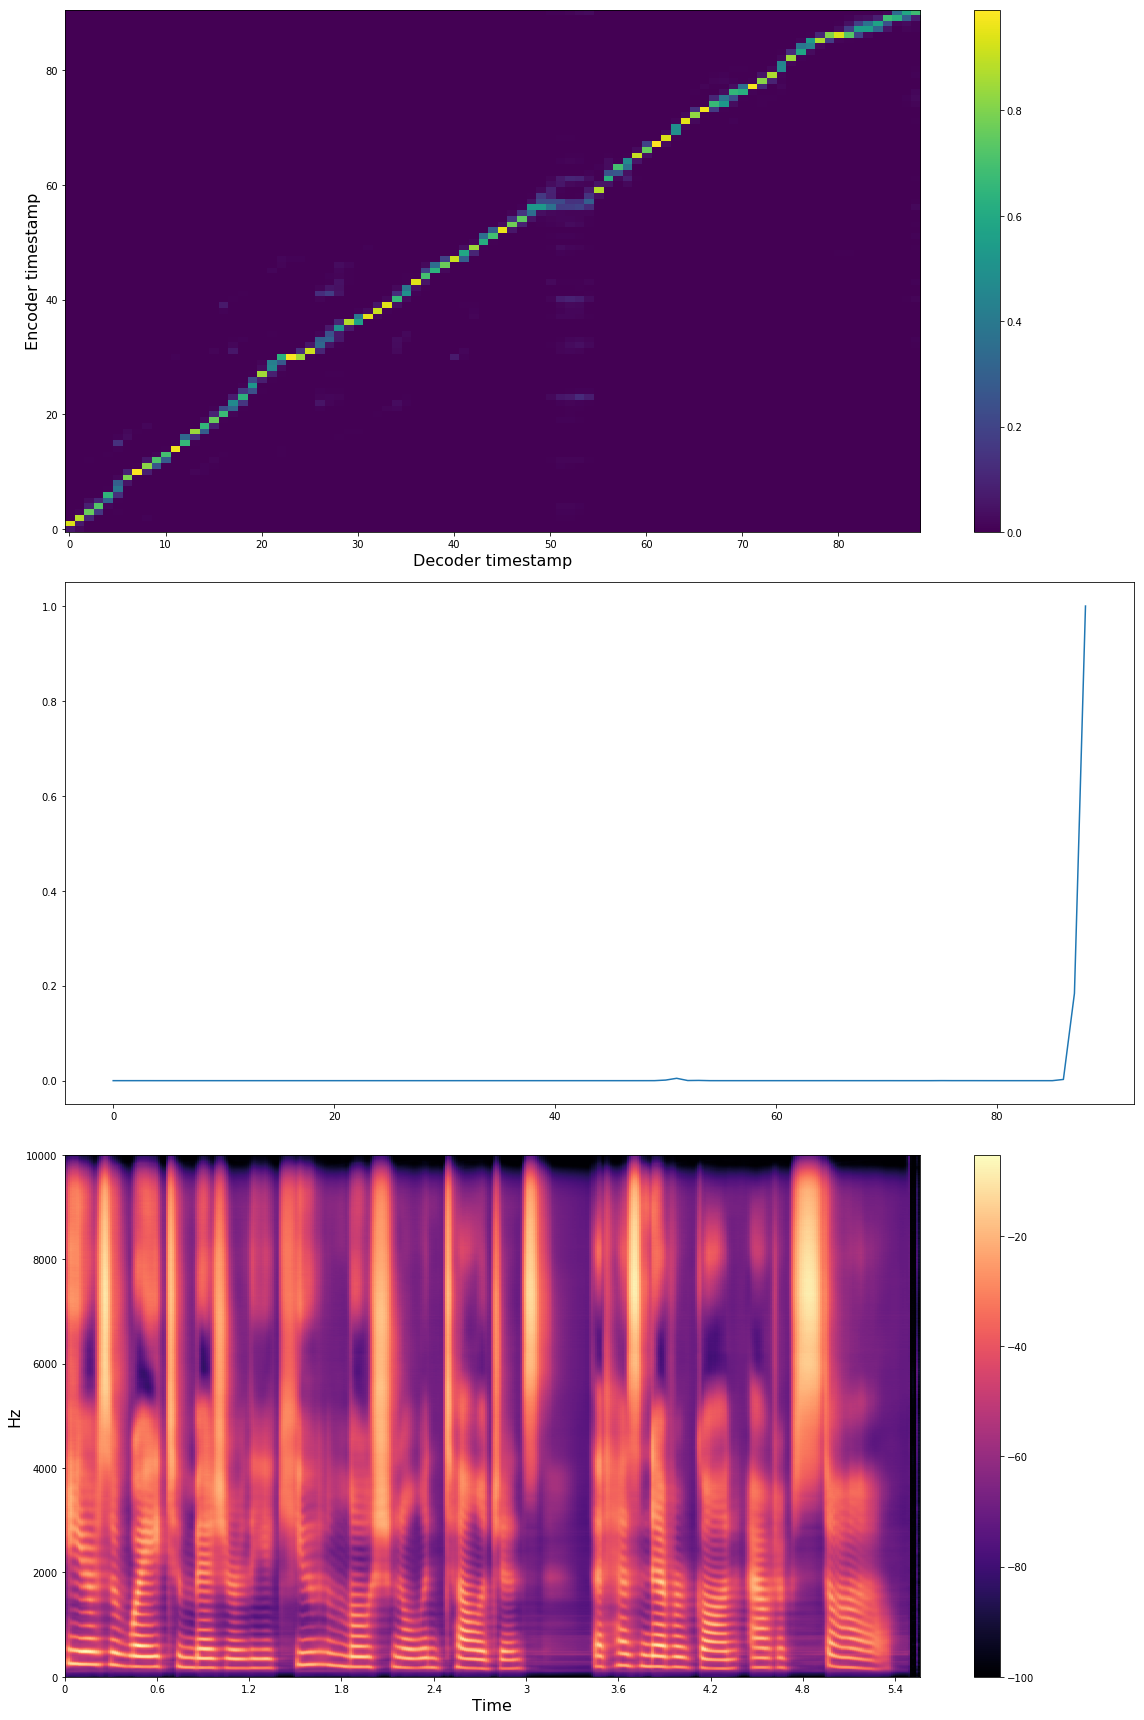

In [30]:
sentence = "here’s a way to measure the acute emotional intelligence that has never gone out of style."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

/home/erogol/projects/TTS/notebooks/utils.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  torch.from_numpy(seq), volatile=True).unsqueeze(0).cuda()


 >  Run-time: 2.8492112159729004


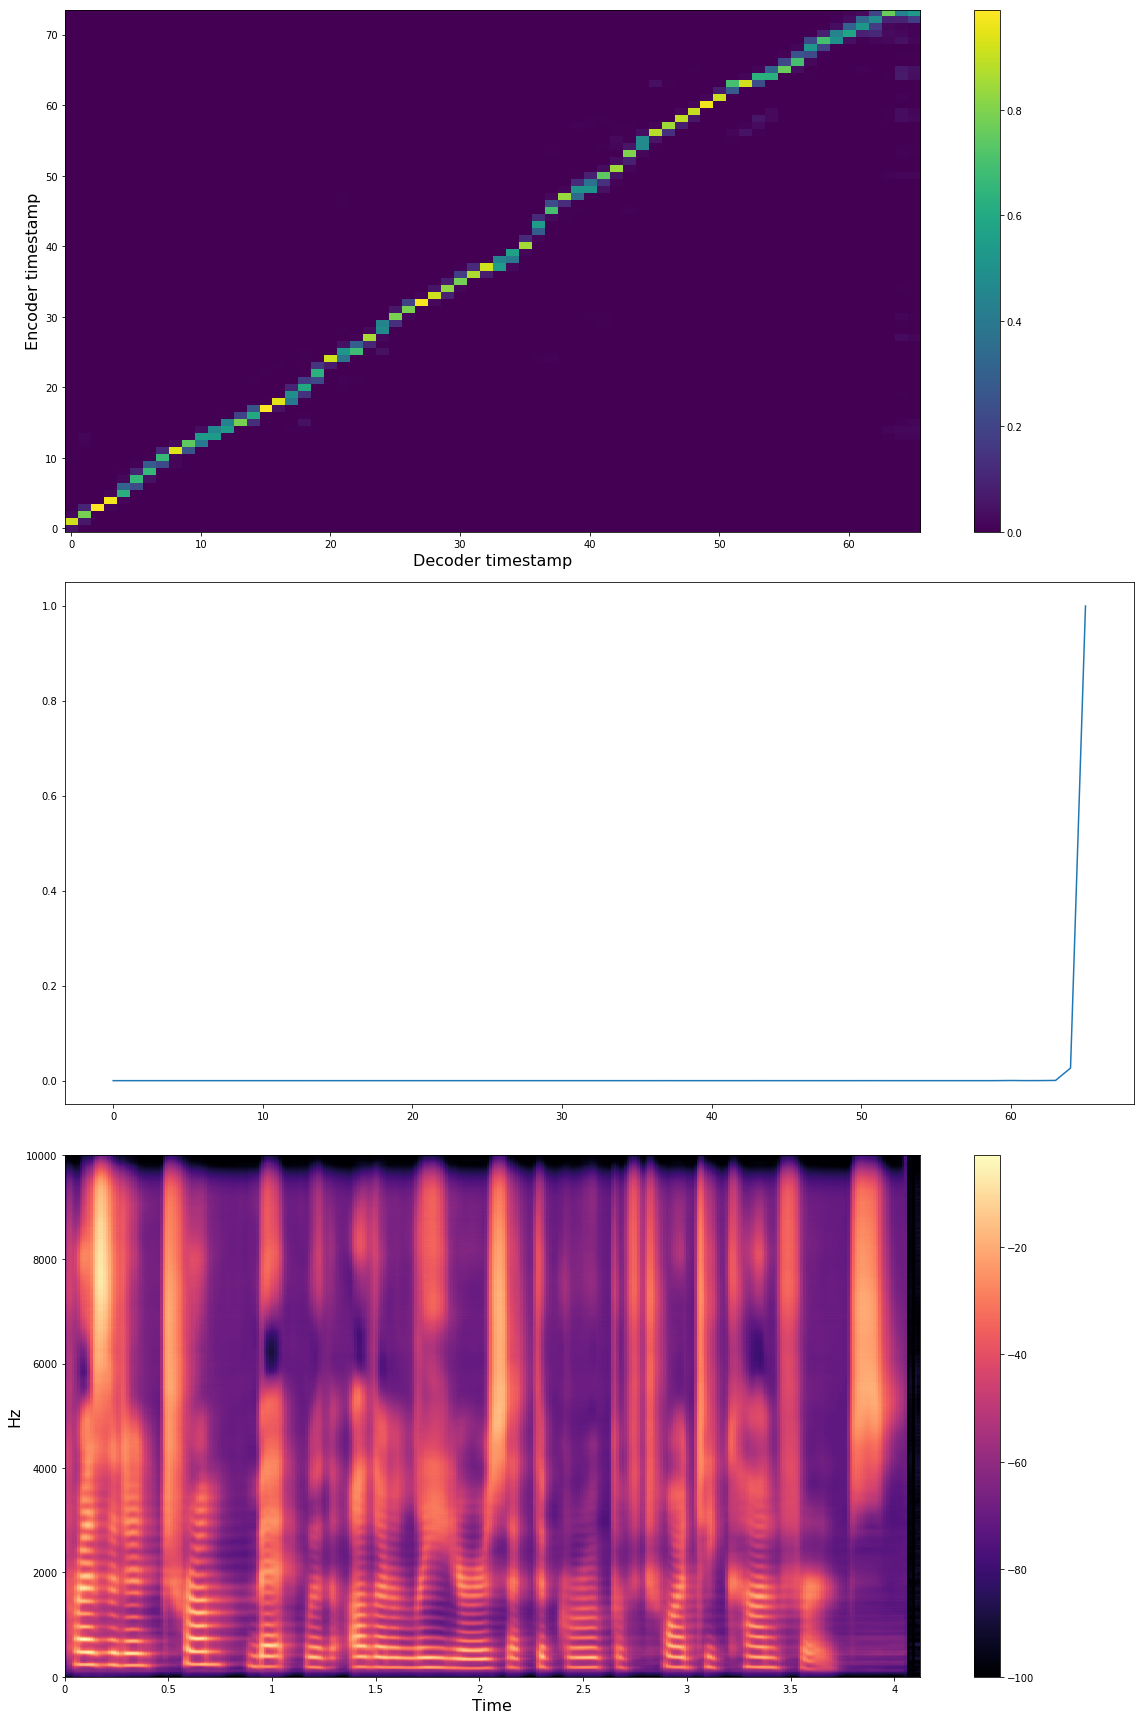

In [31]:
sentence = "President Trump met with other leaders at the Group of 20 conference."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

In [ ]:
sentence = "The buses aren't the problem, they actually provide a solution."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)